In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [566]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv',header=0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [567]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [568]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [569]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [570]:
df.loc[:122,'Region']=0
df.loc[123:,'Region']=1

In [571]:
df.drop(index=[122,123,124], inplace=True)
df.reset_index(drop=True, inplace=True)

In [572]:
df.fillna(method='ffill', inplace=True)

/var/folders/2l/js00yjg51gq808y69ljjy35w0000gp/T/ipykernel_29040/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [573]:
df['Classes']=df['Classes  ']
df.drop(columns=['Classes  '], inplace=True)
#df.columns=df.columns.str.strip()

In [574]:
df.columns
df1=df.copy()

In [575]:
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws','Region']]=df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws','Region']].astype(int)

In [576]:
col=[features for features in df.columns if df[features].dtype=='O']


In [577]:
for features in col:
    if features!='Classes':
         df[features] = pd.to_numeric(df[features], errors='coerce')

df.isna().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Region         0
Classes        0
dtype: int64

In [578]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')    
df[['DC','FWI']] = imputer.fit_transform(df[['DC','FWI']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    int64  
 14  Classes      244 non-null    object 
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [579]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv', index=False)

## EDA


In [580]:
df.drop(columns=['day', 'month', 'year'], inplace=True)


In [581]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [582]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

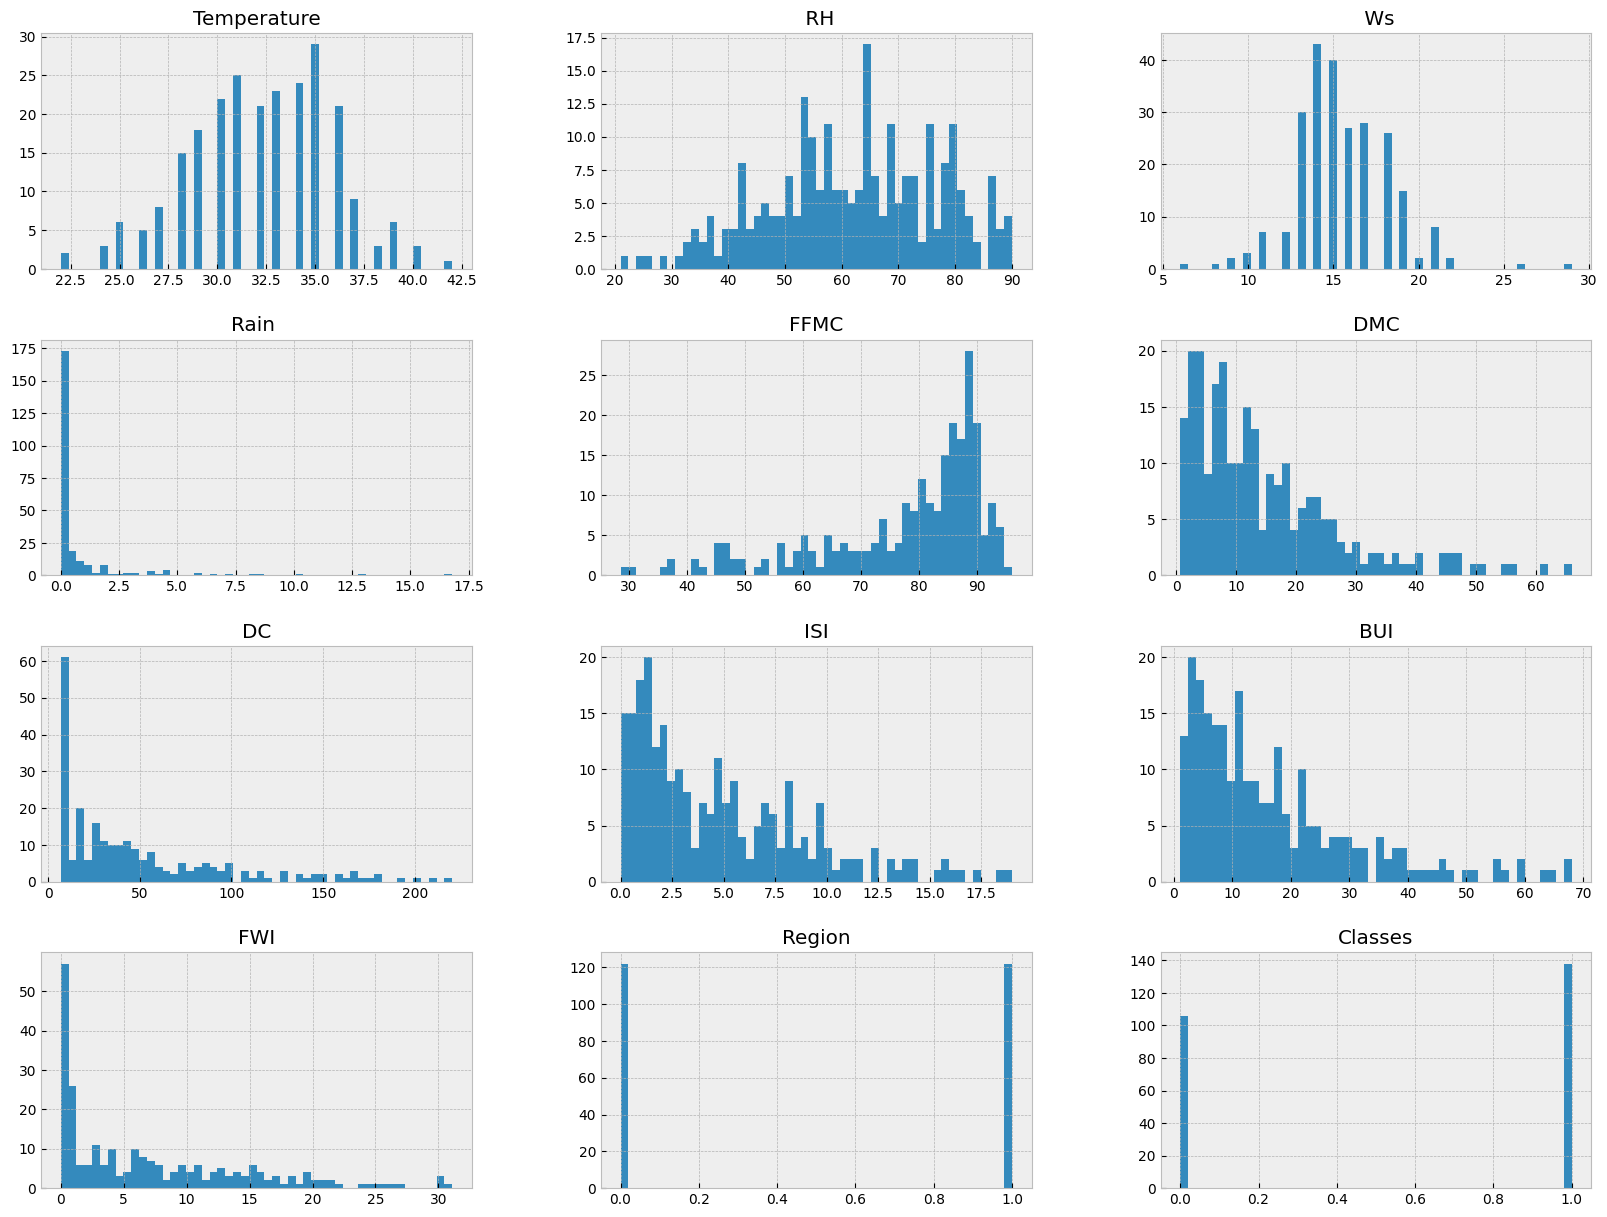

In [583]:
plt.style.use(style= 'bmh')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [584]:
percentage=df['Classes'].value_counts(normalize=True)*100
print(percentage)

Classes
1    56.557377
0    43.442623
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x32e7b5bd0>,
 [Text(-0.22500729230969246, 1.0767412495151567, 'Not Fire'),
  Text(0.22500725808384633, -1.0767412566673527, 'Fire')],
 [Text(-0.12273125035074132, 0.587313408826449, '56.6%'),
  Text(0.12273123168209799, -0.5873134127276468, '43.4%')])

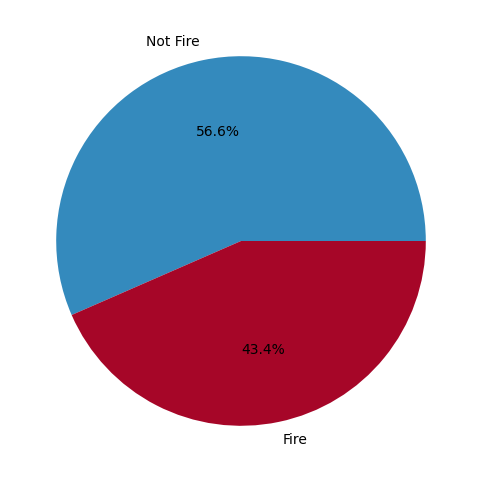

In [585]:
class_labels=['Not Fire','Fire']
plt.figure(figsize=(8,6))
plt.pie(percentage, labels=class_labels, autopct='%1.1f%%')

In [586]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.374909,0.607551,0.455504,0.564599,0.273496,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.225621,-0.690637,-0.348587,-0.577577,-0.406424,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079005,0.015248,0.029756,0.032315,-0.176829,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.297975,-0.347105,-0.299171,-0.324369,-0.041080,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.506778,0.739730,0.589652,0.690289,0.224680,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875887,0.674499,0.982073,0.875827,0.191094,0.584188
DC,0.374909,-0.225621,0.079005,-0.297975,0.506778,0.875887,1.000000,0.505032,0.941610,0.739521,-0.078572,0.510315
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.505032,1.000000,0.635891,0.916343,0.268421,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941610,0.635891,1.000000,0.857628,0.087370,0.583882
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.739521,0.916343,0.857628,1.000000,0.196696,0.718079


<Axes: ylabel='FWI'>

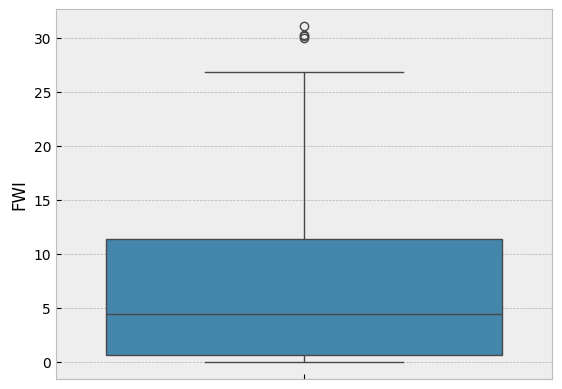

In [587]:
sns.boxplot(df['FWI'])

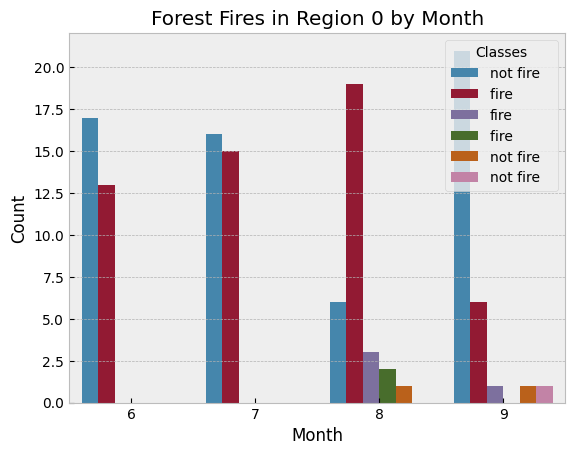

In [588]:
#Analysisn of Forest Fires in Region 0 by Month
dftemp=df1.loc[df1['Region']==0]
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),'not fire','fire')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.title('Forest Fires in Region 0 by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



## Feature selection on clean dataset

In [589]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv',header=0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire


In [590]:
df.drop(columns=['day', 'month', 'year'], inplace=True)


In [591]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [592]:
X=df.drop(columns=['FWI'])
y=df['FWI']

In [593]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [594]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Temperature,1.000000,-0.645584,-0.247199,-0.368708,0.693709,0.475549,0.379642,0.613364,0.451311,0.235616,0.518200
RH,-0.645584,1.000000,0.222038,0.257298,-0.626494,-0.397205,-0.220307,-0.698621,-0.341804,-0.407302,-0.413350
Ws,-0.247199,0.222038,1.000000,0.252652,-0.158997,-0.008072,0.074978,0.023646,0.024779,-0.215146,-0.074964
Rain,-0.368708,0.257298,0.252652,1.000000,-0.589240,-0.289214,-0.296722,-0.352227,-0.299209,-0.095164,-0.400740
FFMC,0.693709,-0.626494,-0.158997,-0.589240,1.000000,0.598633,0.514171,0.742612,0.589980,0.234575,0.778101
DMC,0.475549,-0.397205,-0.008072,-0.289214,0.598633,1.000000,0.881134,0.661927,0.982753,0.182714,0.577985
DC,0.379642,-0.220307,0.074978,-0.296722,0.514171,0.881134,1.000000,0.510455,0.942964,-0.091679,0.510303
ISI,0.613364,-0.698621,0.023646,-0.352227,0.742612,0.661927,0.510455,1.000000,0.630598,0.265568,0.736906
BUI,0.451311,-0.341804,0.024779,-0.299209,0.589980,0.982753,0.942964,0.630598,1.000000,0.077740,0.581441
Region,0.235616,-0.407302,-0.215146,-0.095164,0.234575,0.182714,-0.091679,0.265568,0.077740,1.000000,0.146628


<Axes: >

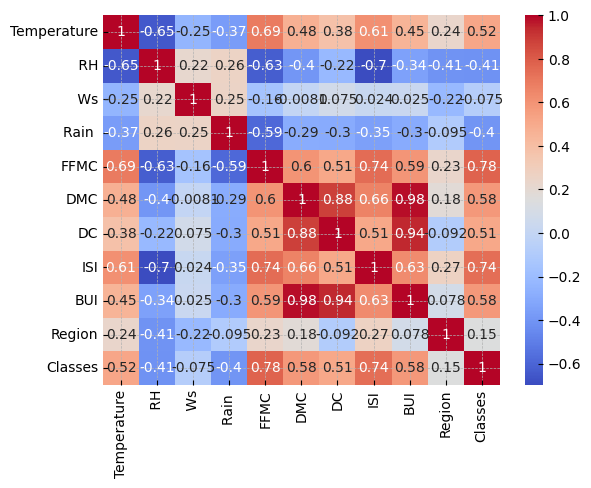

In [595]:
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

In [596]:
# Reduce Multicollinearity
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr


In [597]:
correlations_col = correlation(X_train, 0.85)
print('Correlated columns to drop: ', correlations_col)

Correlated columns to drop:  {'DC', 'BUI'}


In [598]:
X_train.drop(columns=correlations_col, inplace=True)
X_test.drop(columns=correlations_col, inplace=True)

### Feature Scaling and Standardization

In [600]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'After Scaling')

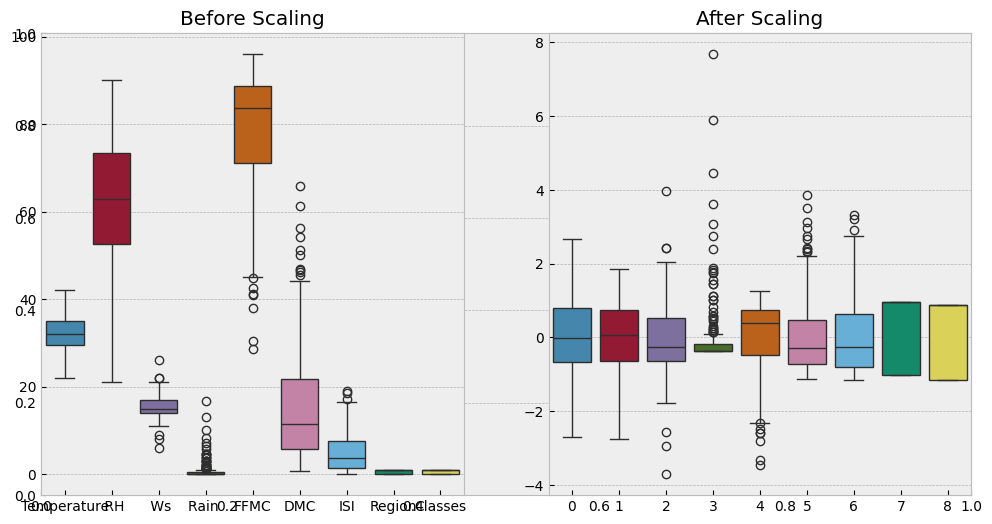

In [601]:
plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')



In [604]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, r2_score
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mae_lr}')
print(f'Linear Regression R2 Score: {r2_lr}')

Linear Regression MSE: 0.4714337059876168
Linear Regression R2 Score: 0.9902114014217167


In [605]:
#Ridge Regression
from sklearn.linear_model import Ridge  
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mae_ridge}')
print(f'Ridge Regression R2 Score: {r2_ridge}')


Ridge Regression MSE: 0.49425327914192846
Ridge Regression R2 Score: 0.9894407136907512


In [606]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mae_lasso}')
print(f'Lasso Regression R2 Score: {r2_lasso}')


Lasso Regression MSE: 0.657226280645366
Lasso Regression R2 Score: 0.9833837942749786


In [607]:
#Cross validation Lasso
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV( cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv_model.predict(X_test_scaled)
print(f'Optimal alpha: {lasso_cv_model.alpha_}')


Optimal alpha: 0.02440750801112733
